In [1]:
import numpy as np 
import pandas as pd 
import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('../InformatiCup2018/Eingabedaten/Benzinpreise/10.csv', delimiter=";", names = ["dates", "price"])

data["dates"] = pd.to_datetime(data["dates"])

data.index = data["dates"].values

In [36]:
data['price'].mean()

1361.071887784921

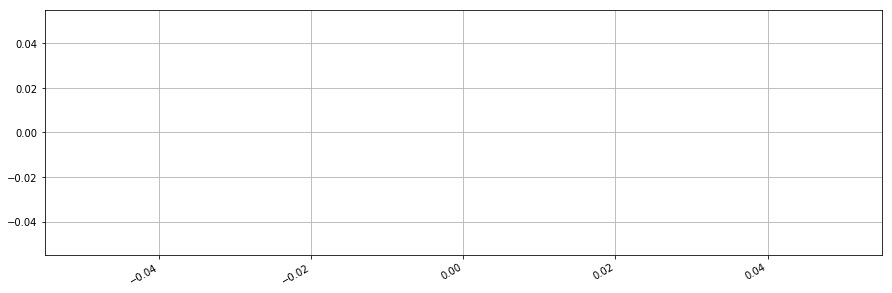

In [2]:
def getInterval(start_date, end_date):
    mask = (data['dates'] > start_date) & (data['dates'] <= end_date)
    return data.loc[mask]

def plotYear(year): 
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(111)
    ax.plot(year.index, year['price'])
    fig.autofmt_xdate()
    ax.grid(True)

yearOne = getInterval(datetime(2014, 1, 1), datetime(2015, 1, 1))
yearTwo = getInterval(datetime(2015, 1, 1), datetime(2016, 1, 1))
yearThree = getInterval(datetime(2016, 1, 1), datetime(2017, 1, 1))
yearFour = getInterval(datetime(2017, 1, 1), datetime(2018, 1, 1))


In [ ]:
plotYear(yearOne)

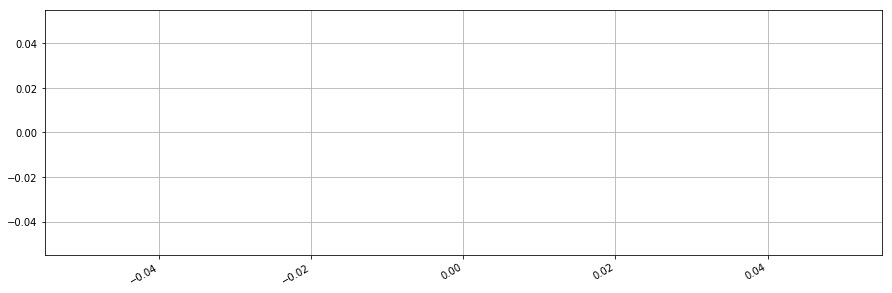

In [3]:
plotYear(yearTwo)

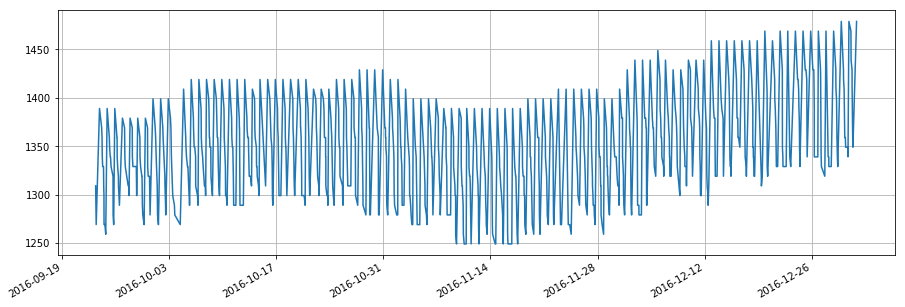

In [4]:
plotYear(yearThree)

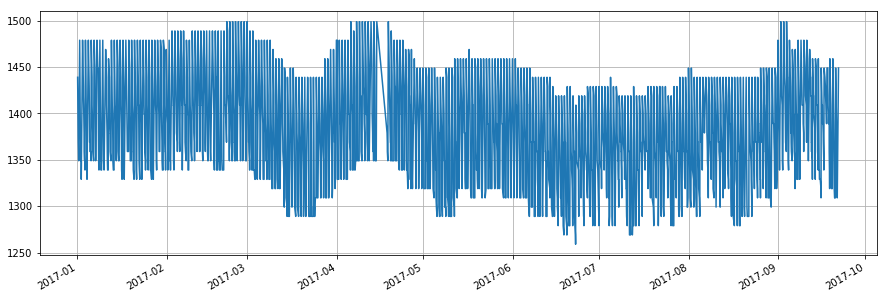

In [5]:
plotYear(yearFour)

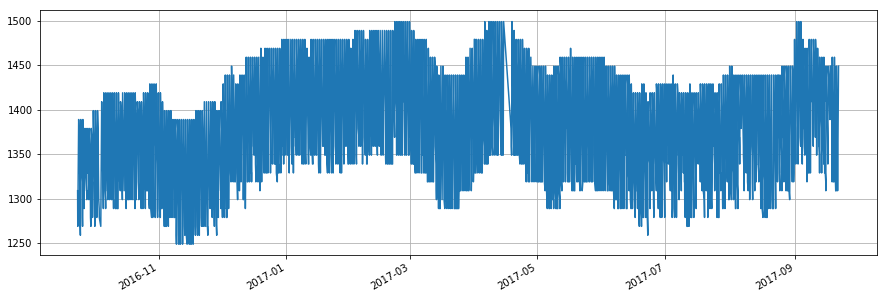

In [6]:
plotYear(data)

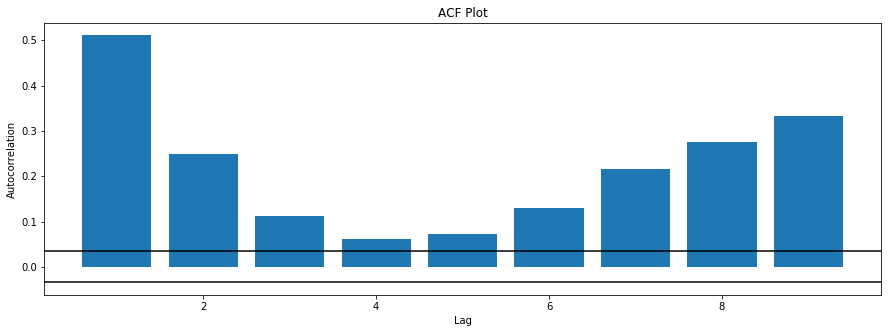

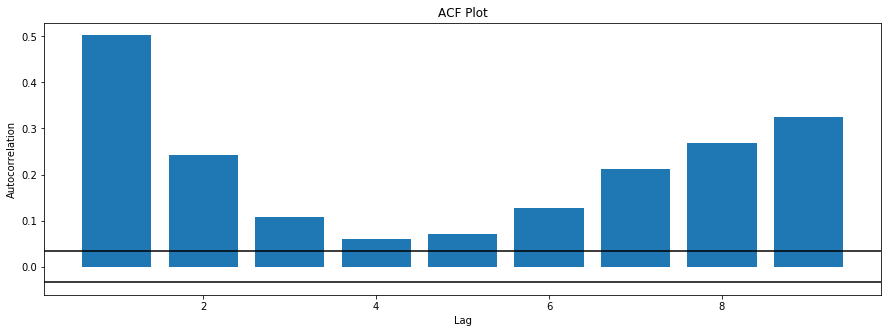

In [7]:
pf.acf_plot(data["price"].values, max_lag=48)
pf.acf_plot(np.square(data["price"].values), max_lag=48)

# ARIMA

In [61]:
#model = pf.ARIMA(data=data, ar=1, ma=0, target='price', family=pf.Normal())
model = pf.ARIMA(data=data, ar=0, ma=4, target='price', family=pf.Normal())

In [62]:
x = model.fit("MLE")
x.summary()

Normal ARIMA(0,0,4)                                                                                       
======================================================= ==================================================
Dependent Variable: price                               Method: MLE                                       
Start Date: 2016-09-24 03:13:31                         Log Likelihood: -17820.8181                       
End Date: 2017-09-21 20:23:05                           AIC: 35653.6362                                   
Number of observations: 3418                            BIC: 35690.4571                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 1361.072   1.467      927.7643 0.0      (1358.1966 | 1363.9474)  
MA(1)                                

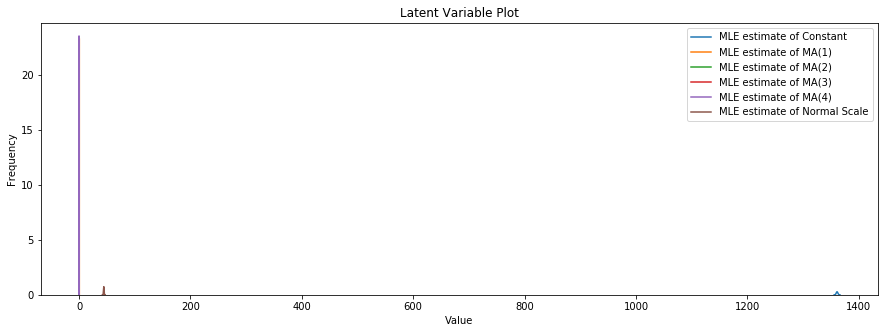

In [63]:
model.plot_z(figsize=(15,5))

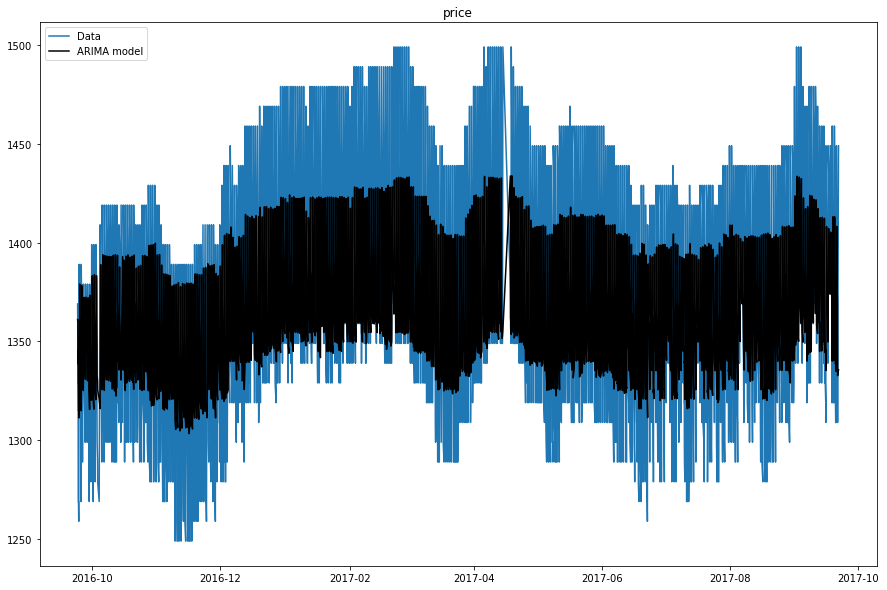

In [64]:
model.plot_fit(figsize=(15,10))

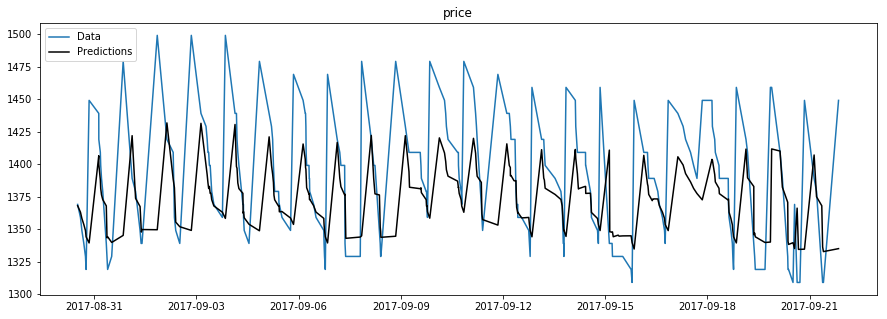

In [65]:
model.plot_predict_is(h=250, figsize=(15,5))

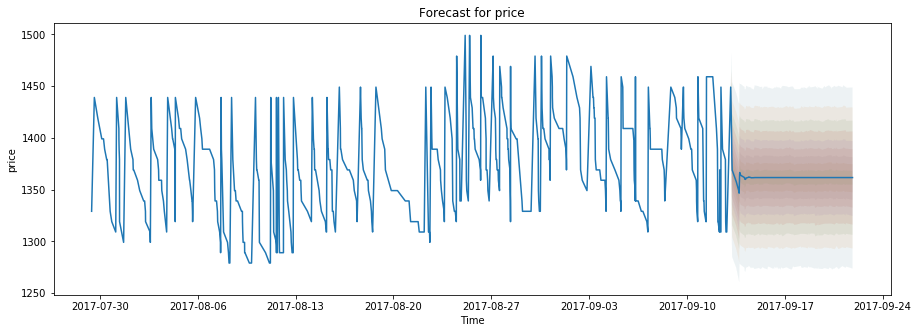

In [60]:
model.plot_predict(h=100,past_values=500,figsize=(15,5))

# ARIMAX

In [63]:
model = pf.ARIMAX(data=data, ar=1, ma=1, family=pf.Normal())
x = model.fit("MLE")
x.summary()

TypeError: __init__() missing 1 required positional argument: 'formula'